In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np


In [2]:
trl= pd.read_excel('/Users/mehdiarat/Downloads/polygons_data_with_features_fixed.xlsx')

In [3]:
trl

,Polygon Name,Polygon Index,Date,Mean NDVI (Buffered),Mean NDVI (Original Polygon),Mean NDWI (Buffered),Mean NDWI (Original Polygon),Mean LAI (Buffered),Mean LAI (Original Polygon)
0,mısır_1,1,2023-03-30,0.0305,0.0257,-0.0274,-0.0209,0.0155,0.0190
1,mısır_1,1,2023-03-27,0.0320,0.0232,-0.0418,-0.0310,0.0210,0.0101
2,mısır_1,1,2023-04-24,0.0676,0.0495,-0.0729,-0.0539,0.1498,0.1050
3,mısır_1,1,2023-03-17,0.0036,0.0001,-0.0063,-0.0041,-0.0816,-0.0738
4,mısır_1,1,2023-11-20,0.0148,0.0112,-0.0165,-0.0128,-0.0412,-0.0336
...,...,...,...,...,...,...,...,...,...
982,mısır5_hsyn,7,2023-12-20,0.0965,0.0496,-0.1361,-0.0838,0.2641,0.1293
983,mısır5_hsyn,7,2023-11-05,0.1175,0.0550,-0.1601,-0.0806,0.3398,0.1488
984,mısır5_hsyn,7,2023-01-04,0.0693,0.0255,-0.0983,-0.0433,0.1655,0.0422
985,mısır5_hsyn,7,2023-12-30,0.0923,0.0516,-0.1399,-0.0908,0.2486,0.1367


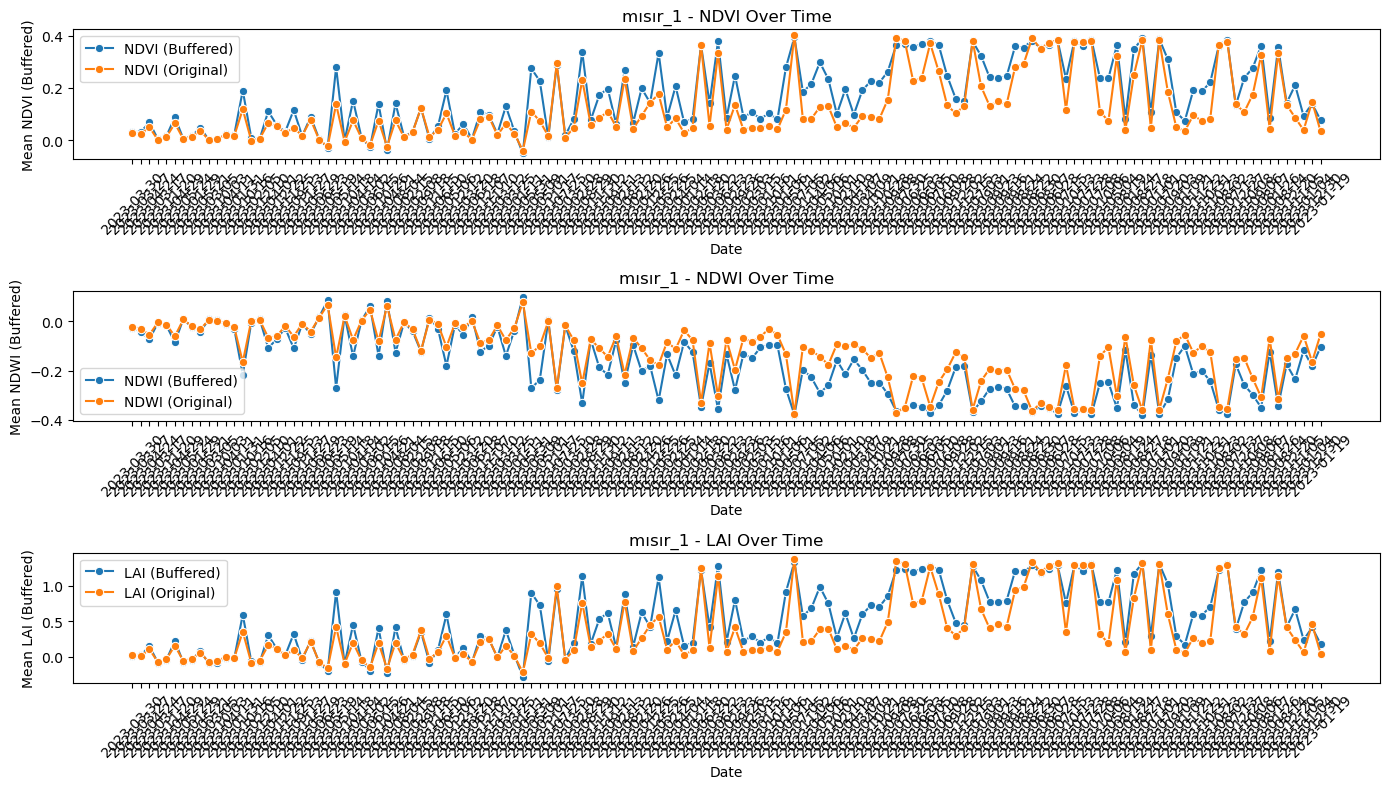

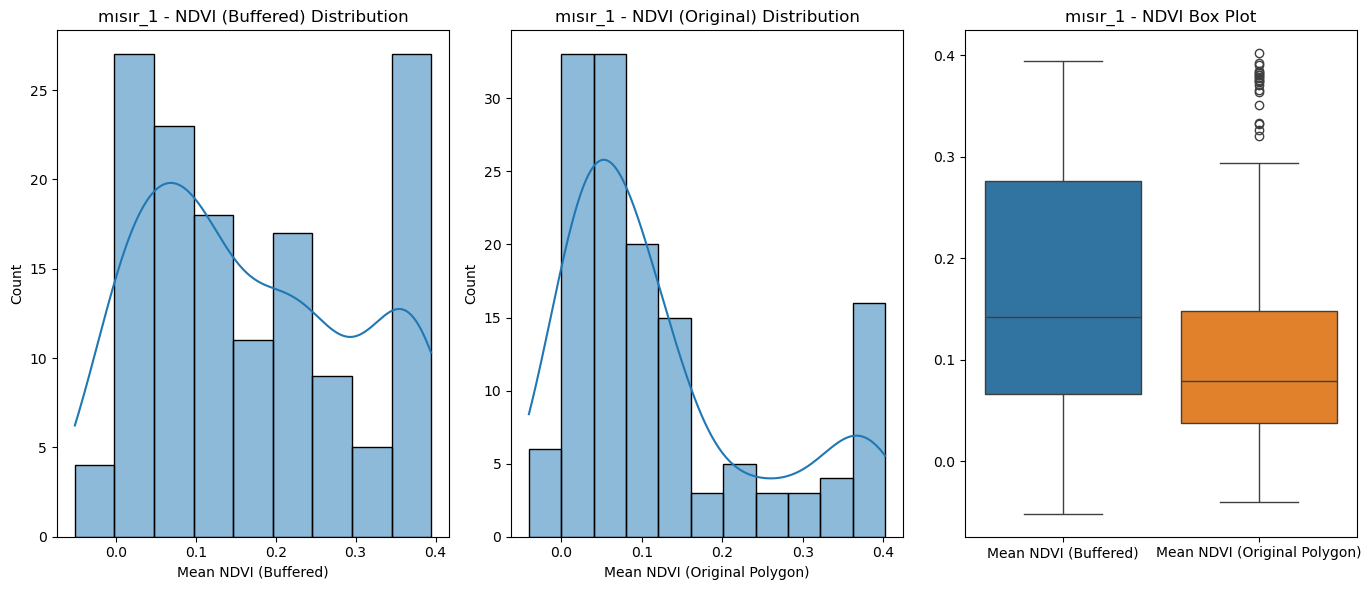

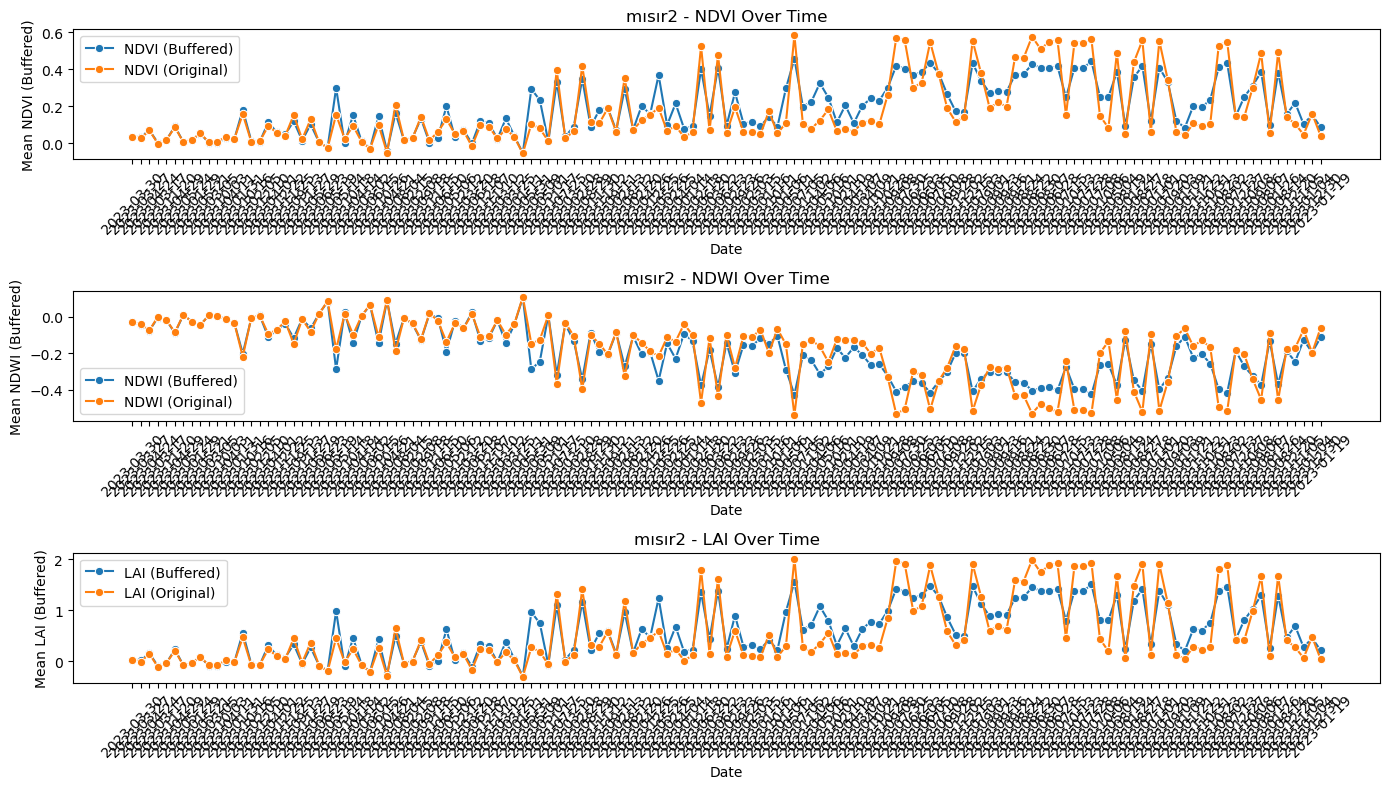

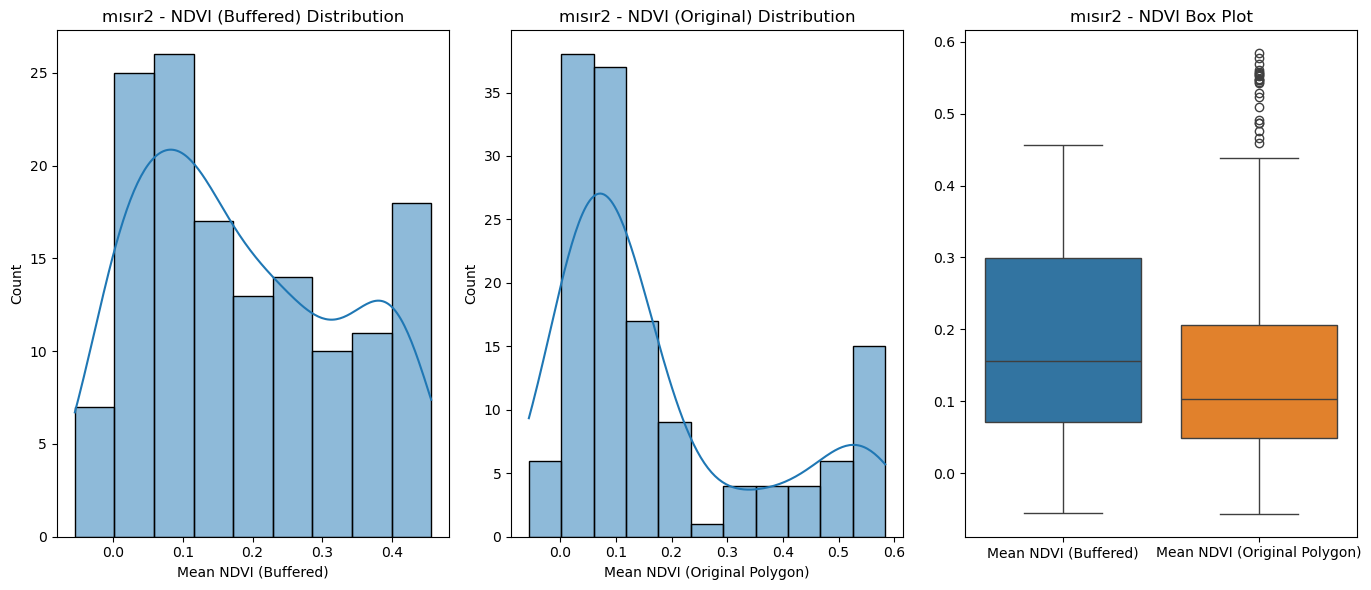

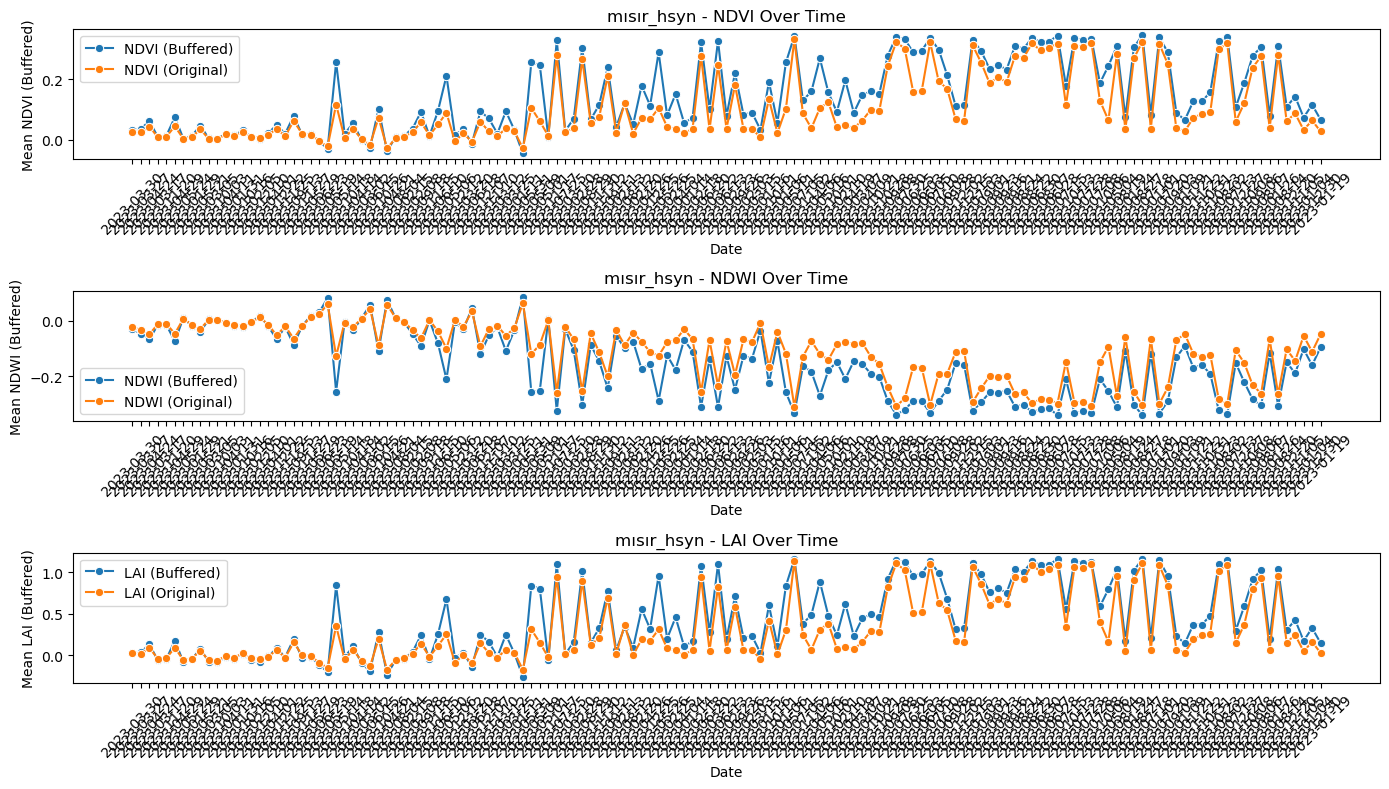

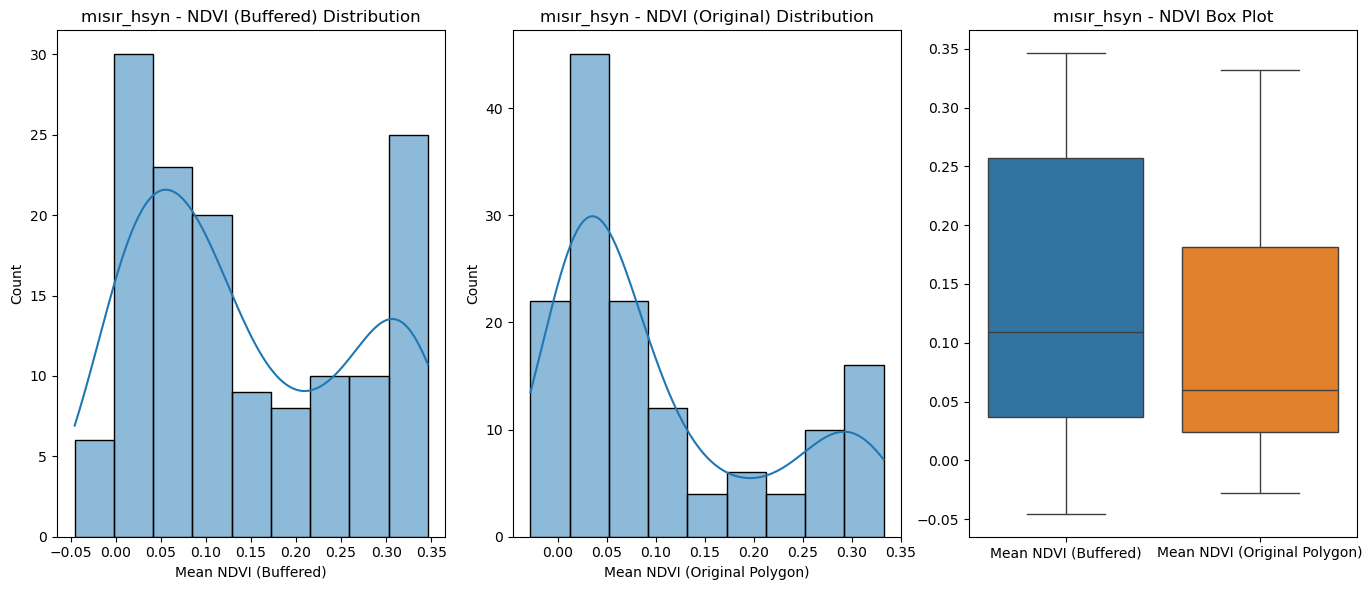

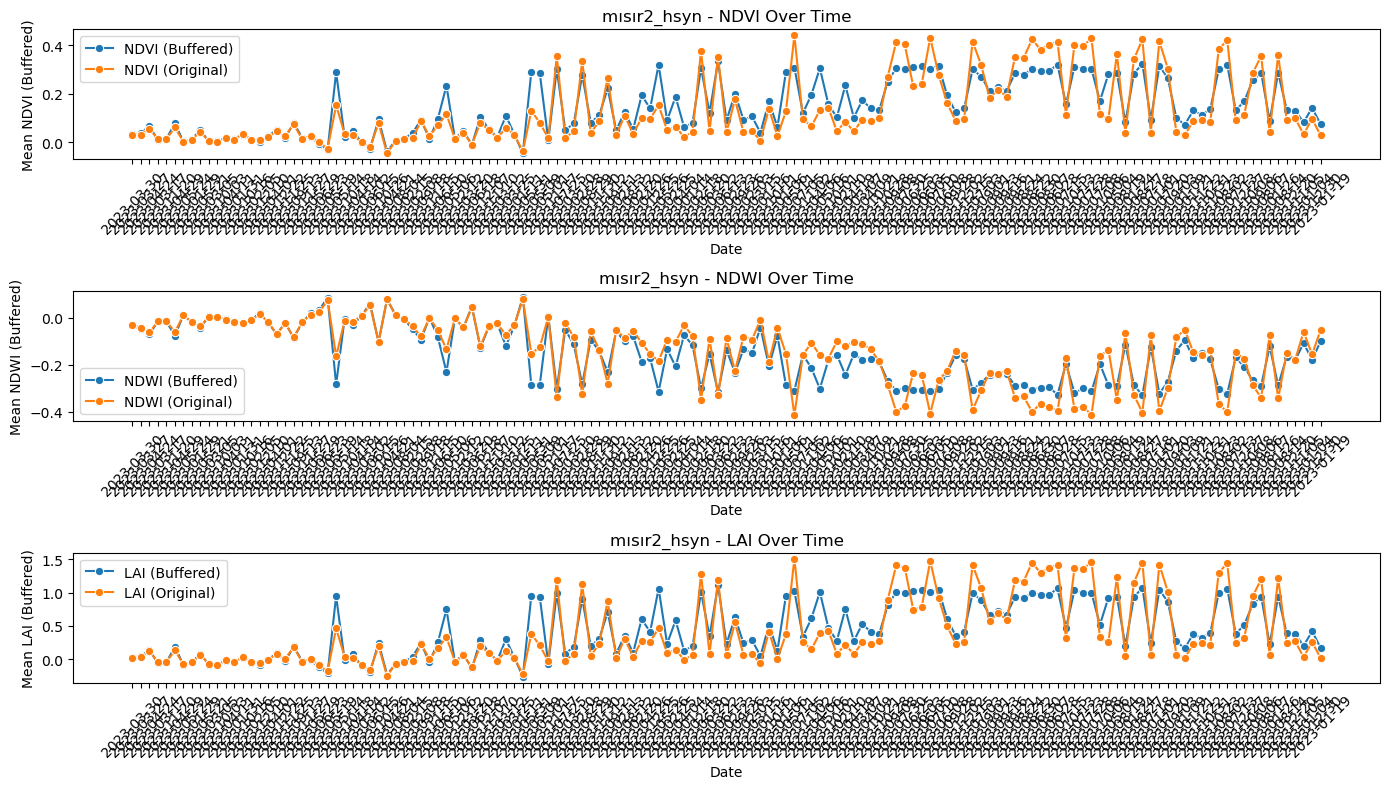

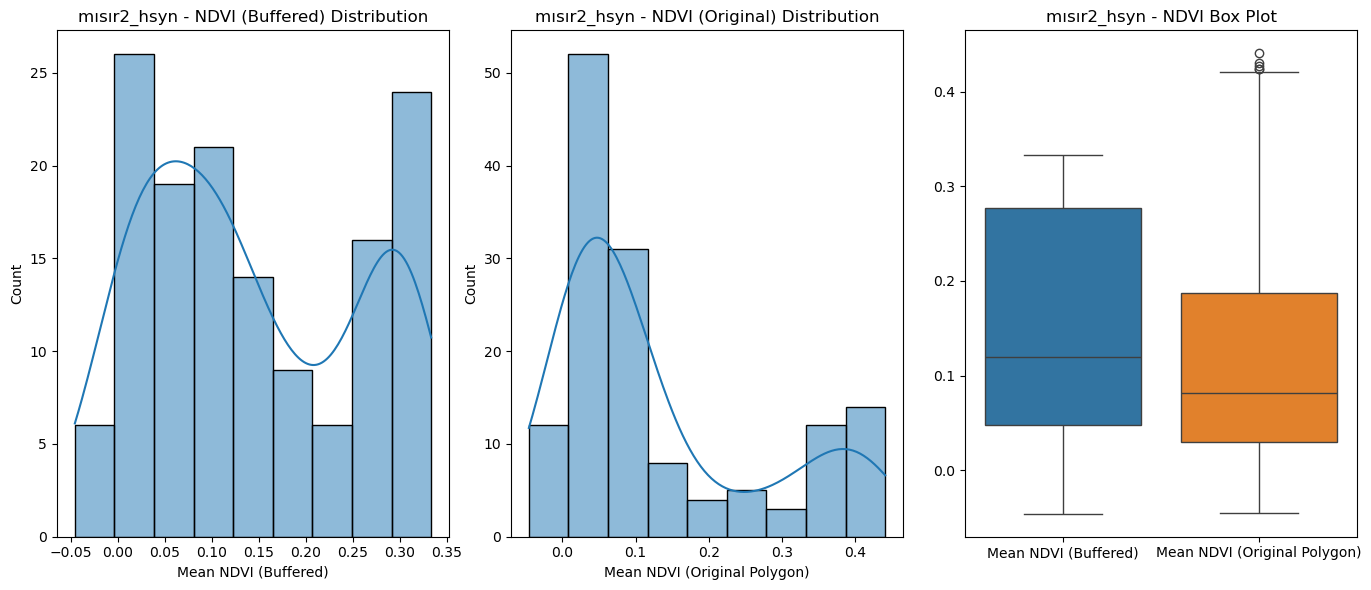

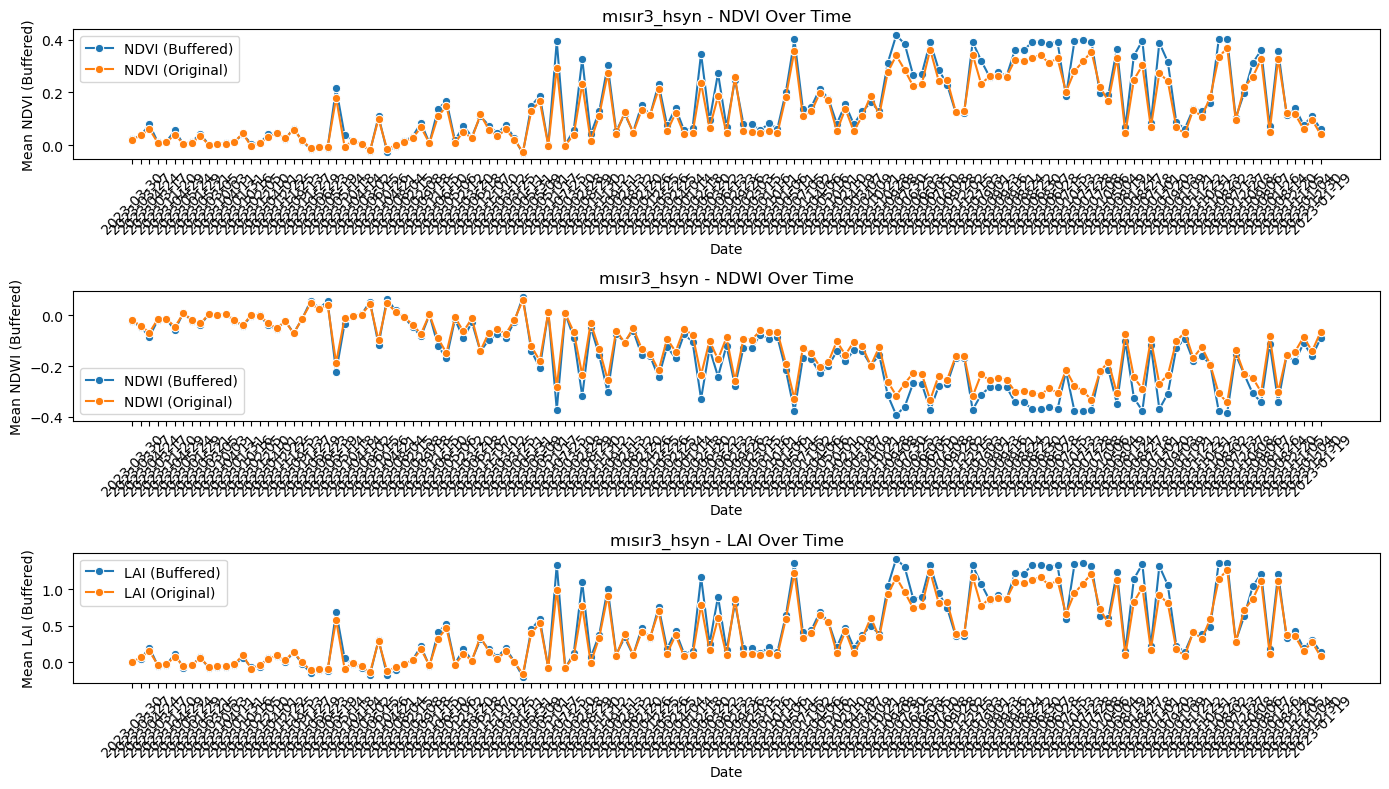

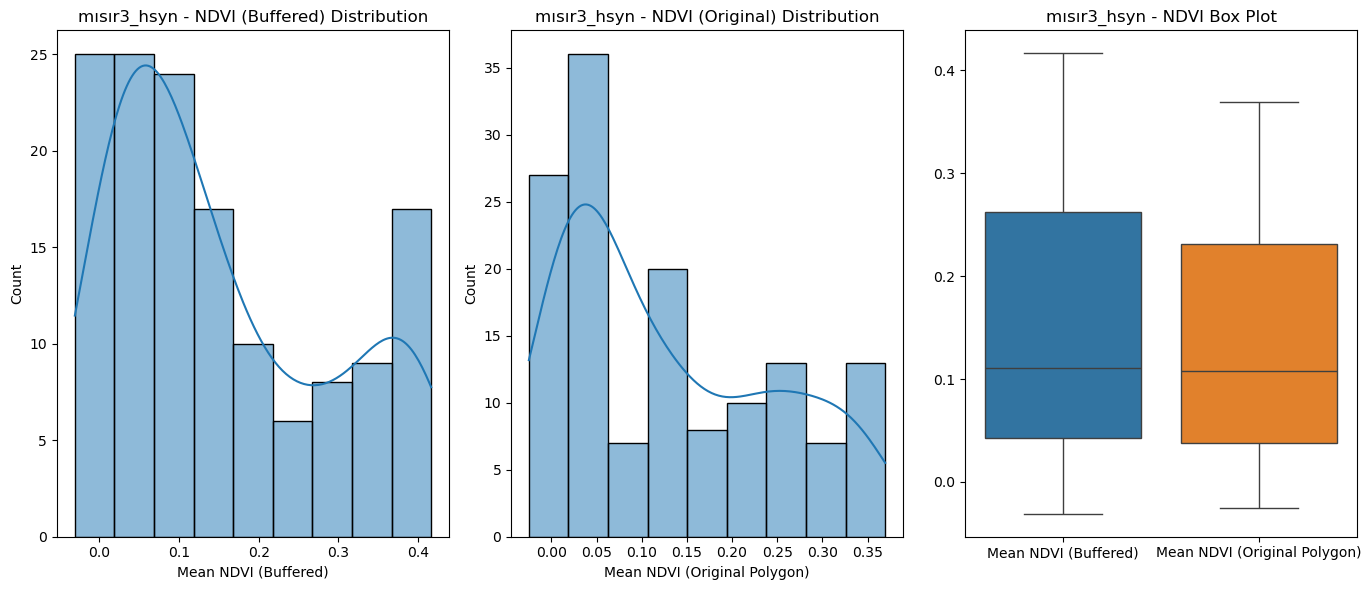

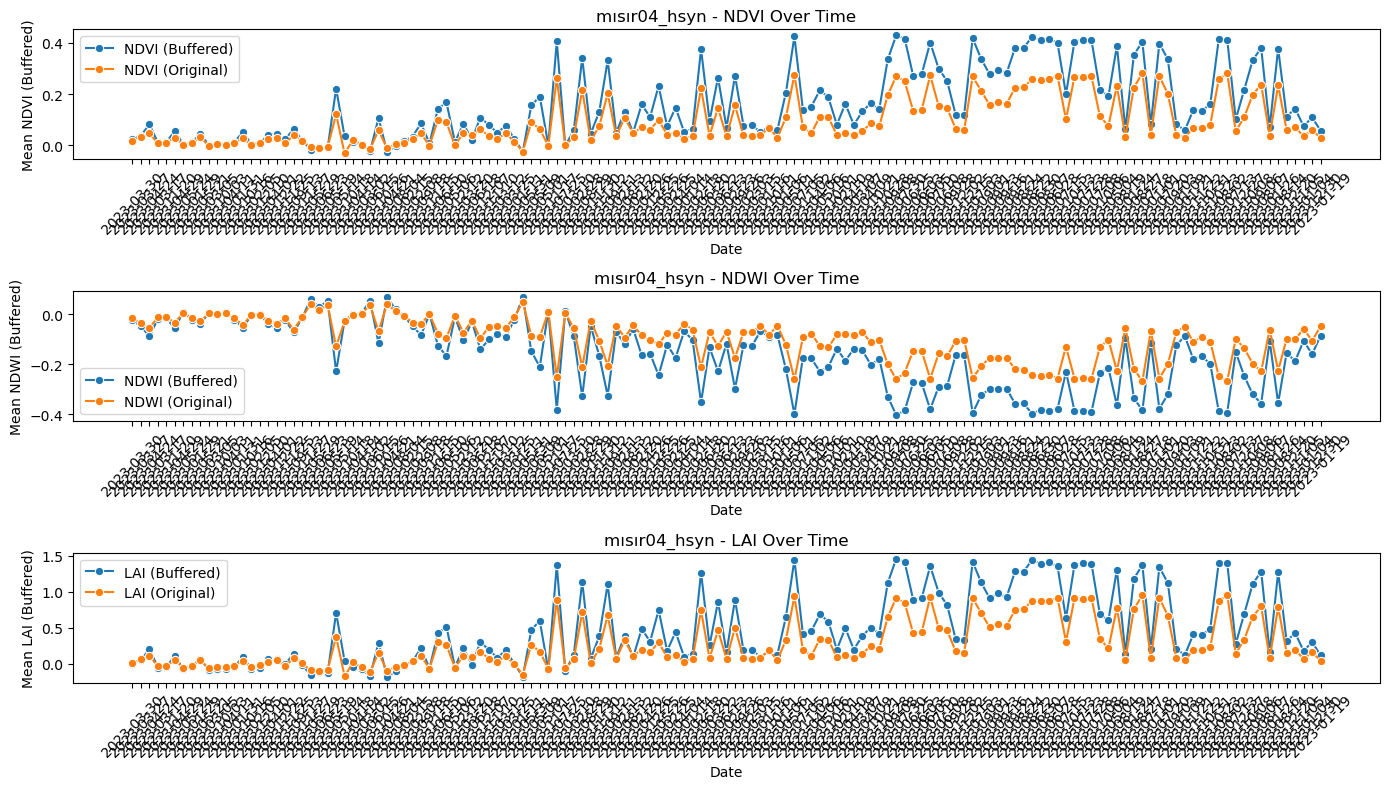

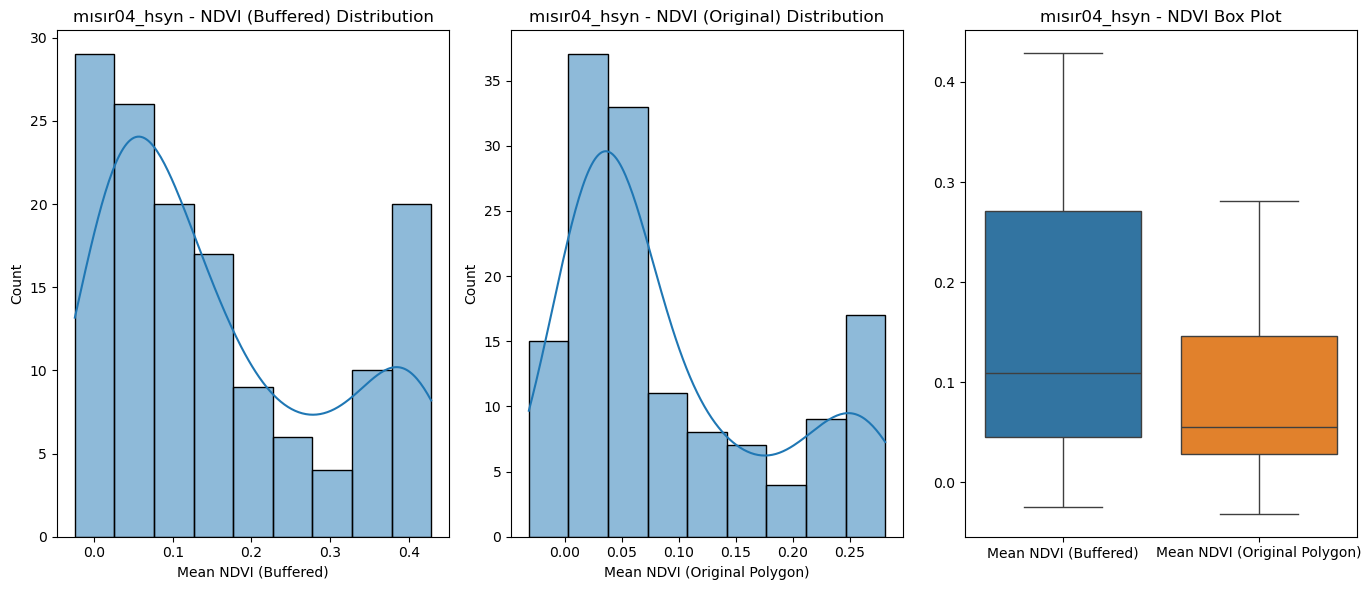

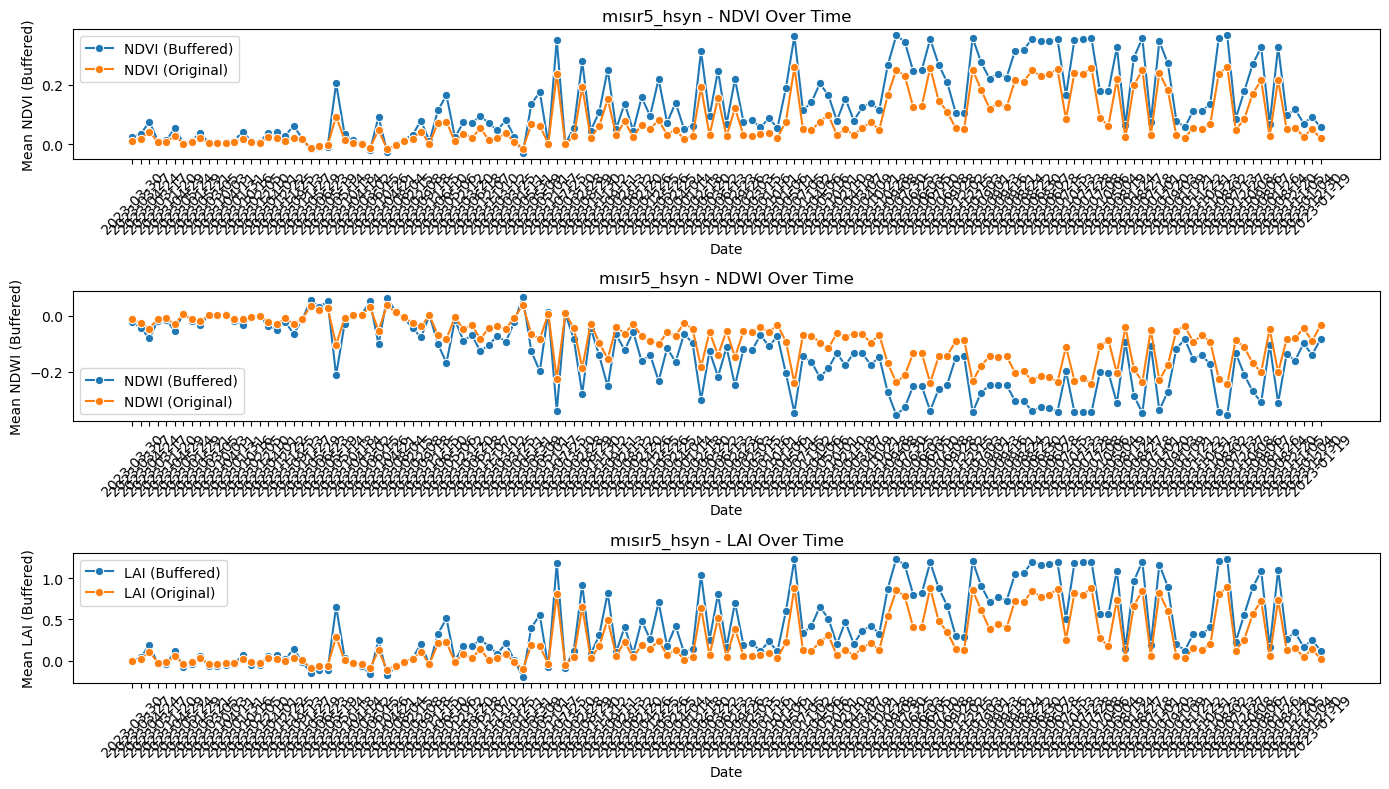

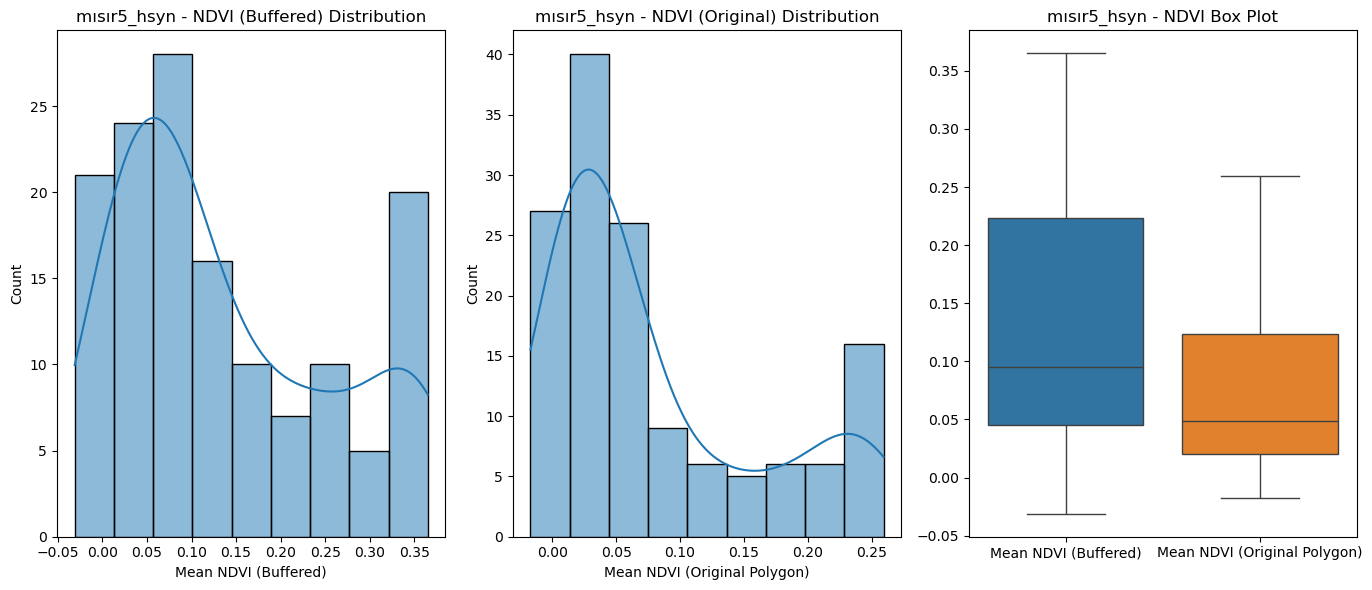

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Excel dosyasını okuyalım
excel_file_path = "polygons_data_with_features_fixed.xlsx"
df = pd.read_excel(excel_file_path)

# Tarlaların listesini alalım (Her poligon için ayrı grafik yapacağız)
polygons = df['Polygon Name'].unique()

# Her tarla (poligon) için ayrı grafik oluşturalım
for polygon in polygons:
    polygon_data = df[df['Polygon Name'] == polygon]  # Her poligon için filtrele
    
    # Grafik alanı oluşturma
    plt.figure(figsize=(14, 8))
    
    # NDVI zaman serisi grafiği
    plt.subplot(3, 1, 1)
    sns.lineplot(x='Date', y='Mean NDVI (Buffered)', data=polygon_data, label='NDVI (Buffered)', marker="o")
    sns.lineplot(x='Date', y='Mean NDVI (Original Polygon)', data=polygon_data, label='NDVI (Original)', marker="o")
    plt.title(f'{polygon} - NDVI Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    
    # NDWI zaman serisi grafiği
    plt.subplot(3, 1, 2)
    sns.lineplot(x='Date', y='Mean NDWI (Buffered)', data=polygon_data, label='NDWI (Buffered)', marker="o")
    sns.lineplot(x='Date', y='Mean NDWI (Original Polygon)', data=polygon_data, label='NDWI (Original)', marker="o")
    plt.title(f'{polygon} - NDWI Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    
    # LAI zaman serisi grafiği
    plt.subplot(3, 1, 3)
    sns.lineplot(x='Date', y='Mean LAI (Buffered)', data=polygon_data, label='LAI (Buffered)', marker="o")
    sns.lineplot(x='Date', y='Mean LAI (Original Polygon)', data=polygon_data, label='LAI (Original)', marker="o")
    plt.title(f'{polygon} - LAI Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

    # Ekstra grafikler: Dağılım grafikleri
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 3, 1)
    sns.histplot(polygon_data['Mean NDVI (Buffered)'], kde=True)
    plt.title(f'{polygon} - NDVI (Buffered) Distribution')
    
    plt.subplot(1, 3, 2)
    sns.histplot(polygon_data['Mean NDVI (Original Polygon)'], kde=True)
    plt.title(f'{polygon} - NDVI (Original) Distribution')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(data=polygon_data[['Mean NDVI (Buffered)', 'Mean NDVI (Original Polygon)']])
    plt.title(f'{polygon} - NDVI Box Plot')
    
    plt.tight_layout()
    plt.show()

    # NDWI ve LAI için de benzer şekilde dağılım grafikleri oluşturabilirsiniz

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Excel dosyasını okuyalım
excel_file_path = "polygons_data_with_features_fixed.xlsx"
df = pd.read_excel(excel_file_path)

# Tarlaların listesini alalım (Her poligon için ayrı grafik yapacağız)
polygons = df['Polygon Name'].unique()

# Kaydetme klasörü oluştur (eğer yoksa)
output_folder = "poligon_grafikleri"
os.makedirs(output_folder, exist_ok=True)

# Her tarla (poligon) için ayrı grafik oluşturalım ve kaydedelim
for polygon in polygons:
    polygon_data = df[df['Polygon Name'] == polygon]  # Her poligon için filtrele
    
    # Grafik alanı oluşturma
    plt.figure(figsize=(14, 8))
    
    # NDVI zaman serisi grafiği
    plt.subplot(3, 1, 1)
    sns.lineplot(x='Date', y='Mean NDVI (Buffered)', data=polygon_data, label='NDVI (Buffered)', marker="o")
    sns.lineplot(x='Date', y='Mean NDVI (Original Polygon)', data=polygon_data, label='NDVI (Original)', marker="o")
    plt.title(f'{polygon} - NDVI Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    
    # NDWI zaman serisi grafiği
    plt.subplot(3, 1, 2)
    sns.lineplot(x='Date', y='Mean NDWI (Buffered)', data=polygon_data, label='NDWI (Buffered)', marker="o")
    sns.lineplot(x='Date', y='Mean NDWI (Original Polygon)', data=polygon_data, label='NDWI (Original)', marker="o")
    plt.title(f'{polygon} - NDWI Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    
    # LAI zaman serisi grafiği
    plt.subplot(3, 1, 3)
    sns.lineplot(x='Date', y='Mean LAI (Buffered)', data=polygon_data, label='LAI (Buffered)', marker="o")
    sns.lineplot(x='Date', y='Mean LAI (Original Polygon)', data=polygon_data, label='LAI (Original)', marker="o")
    plt.title(f'{polygon} - LAI Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    
    plt.tight_layout()
    # Grafik dosyasını kaydetme
    plt.savefig(os.path.join(output_folder, f'{polygon}_time_series.png'), dpi=300)
    plt.close()

    # Ekstra grafikler: Dağılım grafikleri
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 3, 1)
    sns.histplot(polygon_data['Mean NDVI (Buffered)'], kde=True)
    plt.title(f'{polygon} - NDVI (Buffered) Distribution')
    
    plt.subplot(1, 3, 2)
    sns.histplot(polygon_data['Mean NDVI (Original Polygon)'], kde=True)
    plt.title(f'{polygon} - NDVI (Original) Distribution')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(data=polygon_data[['Mean NDVI (Buffered)', 'Mean NDVI (Original Polygon)']])
    plt.title(f'{polygon} - NDVI Box Plot')
    
    plt.tight_layout()
    # Grafik dosyasını kaydetme
    plt.savefig(os.path.join(output_folder, f'{polygon}_distribution_boxplot.png'), dpi=300)
    plt.close()

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Excel dosyasını okuyalım
excel_file_path = "polygons_data_with_features_fixed.xlsx"
df = pd.read_excel(excel_file_path)

# 'Date' sütununu datetime formatına çevirelim
df['Date'] = pd.to_datetime(df['Date'])

# Tarlaların listesini alalım (Her poligon için ayrı grafik yapacağız)
polygons = df['Polygon Name'].unique()

# Kaydetme klasörü oluştur (eğer yoksa)
output_folder = "poligon_grafikleri2"
os.makedirs(output_folder, exist_ok=True)

# Her tarla (poligon) için ayrı grafik oluşturalım ve kaydedelim
for polygon in polygons:
    polygon_data = df[df['Polygon Name'] == polygon]  # Her poligon için filtrele
    
    # Veriyi tarih (Date) sütununa göre kronolojik olarak sıralayalım
    polygon_data = polygon_data.sort_values(by='Date')

    # Grafik alanı oluşturma
    plt.figure(figsize=(14, 8))
    
    # NDVI zaman serisi grafiği
    plt.subplot(3, 1, 1)
    sns.lineplot(x='Date', y='Mean NDVI (Buffered)', data=polygon_data, label='NDVI (Buffered)', marker="o")
    sns.lineplot(x='Date', y='Mean NDVI (Original Polygon)', data=polygon_data, label='NDVI (Original)', marker="o")
    plt.title(f'{polygon} - NDVI Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    
    # NDWI zaman serisi grafiği
    plt.subplot(3, 1, 2)
    sns.lineplot(x='Date', y='Mean NDWI (Buffered)', data=polygon_data, label='NDWI (Buffered)', marker="o")
    sns.lineplot(x='Date', y='Mean NDWI (Original Polygon)', data=polygon_data, label='NDWI (Original)', marker="o")
    plt.title(f'{polygon} - NDWI Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    
    # LAI zaman serisi grafiği
    plt.subplot(3, 1, 3)
    sns.lineplot(x='Date', y='Mean LAI (Buffered)', data=polygon_data, label='LAI (Buffered)', marker="o")
    sns.lineplot(x='Date', y='Mean LAI (Original Polygon)', data=polygon_data, label='LAI (Original)', marker="o")
    plt.title(f'{polygon} - LAI Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    
    plt.tight_layout()
    # Grafik dosyasını kaydetme
    plt.savefig(os.path.join(output_folder, f'{polygon}_time_series.png'), dpi=300)
    plt.close()

    # Ekstra grafikler: Dağılım grafikleri
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 3, 1)
    sns.histplot(polygon_data['Mean NDVI (Buffered)'], kde=True)
    plt.title(f'{polygon} - NDVI (Buffered) Distribution')
    
    plt.subplot(1, 3, 2)
    sns.histplot(polygon_data['Mean NDVI (Original Polygon)'], kde=True)
    plt.title(f'{polygon} - NDVI (Original) Distribution')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(data=polygon_data[['Mean NDVI (Buffered)', 'Mean NDVI (Original Polygon)']])
    plt.title(f'{polygon} - NDVI Box Plot')
    
    plt.tight_layout()
    # Grafik dosyasını kaydetme
    plt.savefig(os.path.join(output_folder, f'{polygon}_distribution_boxplot.png'), dpi=300)
    plt.close()

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import matplotlib.dates as mdates

# Excel dosyasını okuyalım
excel_file_path = "polygons_data_with_features_fixed.xlsx"
df = pd.read_excel(excel_file_path)

# 'Date' sütununu datetime formatına çevirelim
df['Date'] = pd.to_datetime(df['Date'])

# Tarlaların listesini alalım (Her poligon için ayrı grafik yapacağız)
polygons = df['Polygon Name'].unique()

# Kaydetme klasörü oluştur (eğer yoksa)
output_folder = "poligon_grafikleri3"
os.makedirs(output_folder, exist_ok=True)

# Her tarla (poligon) için ayrı grafik oluşturalım ve kaydedelim
for polygon in polygons:
    polygon_data = df[df['Polygon Name'] == polygon]  # Her poligon için filtrele
    
    # Veriyi tarih (Date) sütununa göre kronolojik olarak sıralayalım
    polygon_data = polygon_data.sort_values(by='Date')

    # Grafik alanı oluşturma
    plt.figure(figsize=(14, 8))
    
    # NDVI zaman serisi grafiği
    plt.subplot(3, 1, 1)
    sns.lineplot(x='Date', y='Mean NDVI (Buffered)', data=polygon_data, label='NDVI (Buffered)', marker="o")
    sns.lineplot(x='Date', y='Mean NDVI (Original Polygon)', data=polygon_data, label='NDVI (Original)', marker="o")
    plt.title(f'{polygon} - NDVI Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Günlük olarak ayarla
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Gün formatı
    
    # NDWI zaman serisi grafiği
    plt.subplot(3, 1, 2)
    sns.lineplot(x='Date', y='Mean NDWI (Buffered)', data=polygon_data, label='NDWI (Buffered)', marker="o")
    sns.lineplot(x='Date', y='Mean NDWI (Original Polygon)', data=polygon_data, label='NDWI (Original)', marker="o")
    plt.title(f'{polygon} - NDWI Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Günlük olarak ayarla
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Gün formatı
    
    # LAI zaman serisi grafiği
    plt.subplot(3, 1, 3)
    sns.lineplot(x='Date', y='Mean LAI (Buffered)', data=polygon_data, label='LAI (Buffered)', marker="o")
    sns.lineplot(x='Date', y='Mean LAI (Original Polygon)', data=polygon_data, label='LAI (Original)', marker="o")
    plt.title(f'{polygon} - LAI Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Günlük olarak ayarla
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Gün formatı
    
    plt.tight_layout()
    # Grafik dosyasını kaydetme
    plt.savefig(os.path.join(output_folder, f'{polygon}_time_series.png'), dpi=300)
    plt.close()

    # Ekstra grafikler: Dağılım grafikleri
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 3, 1)
    sns.histplot(polygon_data['Mean NDVI (Buffered)'], kde=True)
    plt.title(f'{polygon} - NDVI (Buffered) Distribution')
    
    plt.subplot(1, 3, 2)
    sns.histplot(polygon_data['Mean NDVI (Original Polygon)'], kde=True)
    plt.title(f'{polygon} - NDVI (Original) Distribution')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(data=polygon_data[['Mean NDVI (Buffered)', 'Mean NDVI (Original Polygon)']])
    plt.title(f'{polygon} - NDVI Box Plot')
    
    plt.tight_layout()
    # Grafik dosyasını kaydetme
    plt.savefig(os.path.join(output_folder, f'{polygon}_distribution_boxplot.png'), dpi=300)
    plt.close()